In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [4]:
import sys

sys.path.append("../")

In [9]:
from src.event_processing import leer_excel

epl = leer_excel("../SampleData/epl.xlsx")

In [11]:
from src.event_processing import (
    separar_partido_del_equipo_en_lineups,
    separar_partido_en_equipo_pov,
    separar_partidos,
)
from src.match_data_extraction import get_jugadores

partidos = separar_partidos(epl)
partido = partidos[0]

In [13]:
partido.columns

Index(['season_id', 'match_id', 'home_team_id', 'home_team_name',
       'away_team_id', 'away_team_name', 'id', 'event_id', 'date', 'time',
       'period_id', 'min', 'sec', 'team_id', 'player_id', 'playerName',
       'playerPosition', 'x', 'y', 'type', 'description', 'outcome'],
      dtype='object')

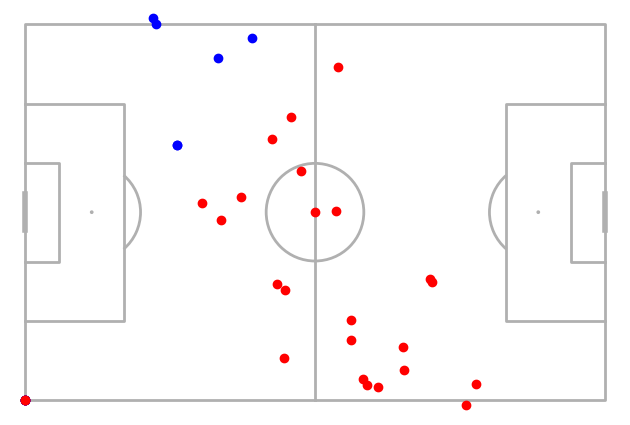

In [15]:
# Matplotlib animation
from mplsoccer import Pitch, VerticalPitch
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

partido.columns # ['season_id', 'match_id', 'home_team_id', 'home_team_name',
#       'away_team_id', 'away_team_name', 'id', 'event_id', 'date', 'time',
#       'period_id', 'min', 'sec', 'team_id', 'player_id', 'playerName',
#       'playerPosition', 'x', 'y', 'type', 'description', 'outcome']

pitch = Pitch(
    pitch_type="opta",
    line_zorder=2,
    # axis=True, label=True
)

# Animation
fig, ax = pitch.draw()

def animate(i):
    ax.clear()
    pitch.draw(ax=ax)
    df = partido[partido["min"] == i]
    for i, row in df.iterrows():
        if row["team_id"] == partido["home_team_id"].iloc[0]:
            color = "red"
        else:
            color = "blue"
        ax.plot(row["x"], row["y"], "o", color=color, zorder=3)

ani = FuncAnimation(fig, animate, frames=range(0, 90), interval=1000)

# save animation to mp4
ani.save("animation.mp4", writer="ffmpeg")